In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pymc3 as pm

## ベルヌーイ分布

２種類のみの結果しか得られないような試行１回の結果を表した確率布。

Text(0, 0.5, 'probability')

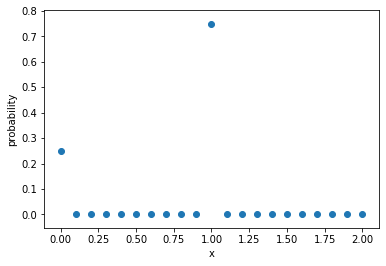

In [2]:
x = np.linspace(0, 2, 21)
p = stats.bernoulli.pmf(x, 0.75)
plt.scatter(x, p)
plt.xlabel('x')
plt.ylabel('probability')

## 二項分布

２種類のみの結果しか得られないような試行のn回分の結果を表した確率布。

Text(0, 0.5, 'probability')

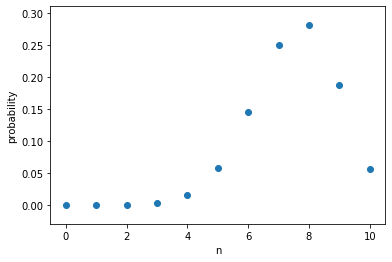

In [3]:
n = 10
x = range(11)
p = stats.binom.pmf(x, n, 0.75)
plt.scatter(x, p)
plt.xlabel('n')
plt.ylabel('probability')

## ポアソン分布

二項分布において、nが十分大きく、pが非常に小さい場合、
$$ (二項分布の期待値) = np = (一定) = λ$$
とした時の確率分布。「ある期間に平均 $λ$ 回起こる現象が、ある期間に $x$ 回起きる確率の分布」。

Text(0.5, 1.0, 'λ=5')

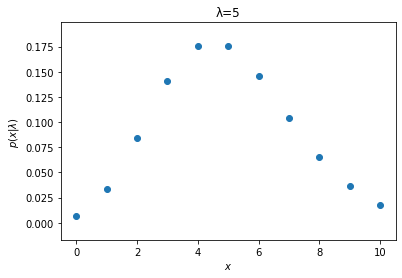

In [4]:
x = range(11)
mu = 5
p = stats.poisson.pmf(x, mu)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p( x | λ) $ ')
plt.title("λ=" + str(mu))

## ベータ分布

分布の万能選手。一様分布にも、直線にも、単調減少などなど。

Text(0.5, 1.0, 'a =10, b = 10')

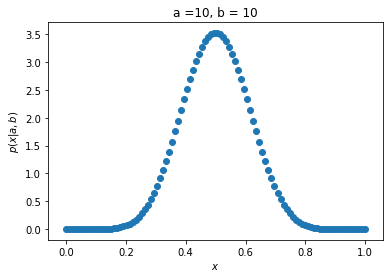

In [5]:
x = np.linspace(0, 1, 100)
a = 10
b = 10
p = stats.beta.pdf(x, a, b)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | a, b) $ ')
plt.title("a =" + str(a) + ", b = " + str(b))

## ガンマ分布

指数分布を一般化。「一定期間に1回起きると期待されるランダムな事象が複数回起きるまでの時間の分布」。

Text(0.5, 1.0, 'a =20, b = 0.1')

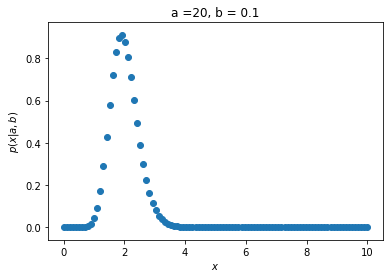

In [6]:
x = np.linspace(0, 10, 100)
a = 20
b = 0.1
p = stats.gamma.pdf(x, a, scale=b)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | a, b) $ ')
plt.title("a =" + str(a) + ", b = " + str(b))

## 指数分布

ある事象が生起するまでの間隔を連続確率変数Xで表したときに，その確率変数Xが従う確率分布。指数分布は連続的な待ち時間分布であり、事故の発生間隔、電球の寿命、下水管の耐用年数、銀行窓口への来客間隔等、日常生活における様々な事象のモデル化に利用。（ほんとか？嘘だろ）

Text(0.5, 1.0, 'λ =5')

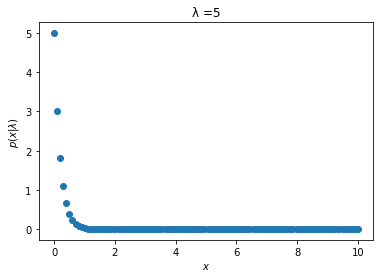

In [7]:
x = np.linspace(0, 10, 100)
lam = 5
p = stats.expon.pdf(x, lam) # これだと違う分布になる
p = lam * np.exp(- lam * x)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | λ) $ ')
plt.title("λ =" + str(lam))

## カイ二乗分布

「標準正規分布 $ N(0,1) $  に従う互いに独立な $ n $ 個の確率変数 $ Z_1,Z_2,…,Z_n $ をそれぞれ二乗した値の合計 $ W $ が従う確率分布」

Text(0.5, 1.0, 'n =5')

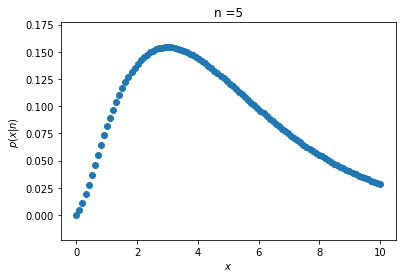

In [8]:
x = np.linspace(0, 10, 100)
n = 5
p = stats.chi2.pdf(x, n)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | n) $ ')
plt.title("n =" + str(n))

## ハーフコーシー分布

事前分布の影響が残りそうな小さなサンプルに対しては、分散の事前分布としてハーフコーシー分布を選ぶと良い。

※コーシー分布は、平均と分散が定義できない、裾野重い分布。時々とんでも無い外れ値をとる。大数の法則が成立しない。

Text(0.5, 1.0, 'μ =5, σ =3')

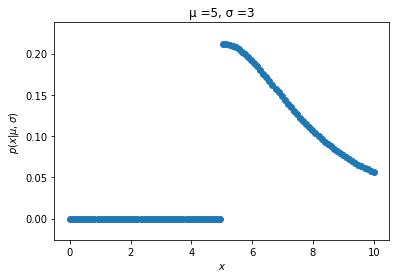

In [9]:
x = np.linspace(0, 10, 100)
mu = 5
sigma = 3
p = stats.halfcauchy.pdf(x, mu, sigma)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | μ, σ) $ ')
plt.title("μ =" + str(mu) + ", σ =" + str(sigma))

## ディリクレ分布

ベータ分布を多変量に拡張した分布。足して全部１になる。割合に適している。

Text(0, 0.5, '$ p(x | k) $ ')

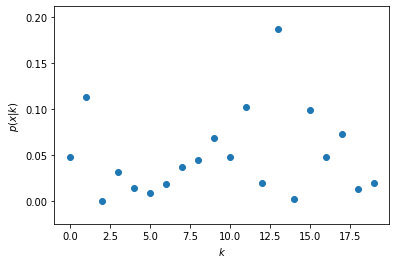

In [10]:
k = 20
a = np.ones(k)
p = stats.dirichlet.rvs(a, size=1, random_state=1)
plt.scatter(range(k), p)
plt.xlabel('$ k $')
plt.ylabel('$ p(x | k) $ ')

## ウィシャート分布

共分散行列の事前分布に適している。

Text(0.5, 1.0, 'df =3, scale =1')

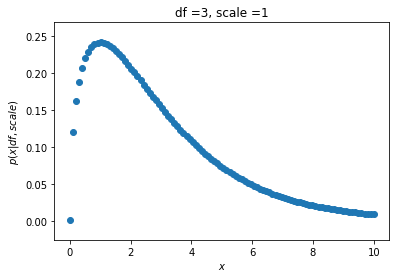

In [11]:
x = np.linspace(1e-5, 10, 100)
df = 3
scale = 1
p = stats.wishart.pdf(x, df=df, scale=scale)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | df, scale) $ ')
plt.title("df =" + str(df) + ", scale =" + str(scale))

## カテゴリカル分布

それぞれ独立した確率 $ p_k $ を持つ $ K $  個の事象が存在し、1 回の独立した試行でそのいずれか一つが観測される離散確率分布。

ベルヌーイ分布を一般化したもの。（逆に言えば、ベルヌーイ分布は $ K = 2 $ としたカテゴリカル分布）

Text(0.5, 1.0, ' k =10')

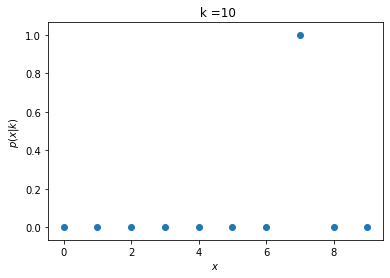

In [12]:
size = 1

# 一様
k = 6
p_k = [1/k] * k

# ディリクレ分布
k = 10
a = np.ones(k)
p_k = stats.dirichlet.rvs(a, size=1, random_state=1)[0]

p = np.random.multinomial(1, p_k, size)
plt.scatter(range(k), p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | k) $ ')
plt.title(" k =" + str(k))

## ロジスティック関数（シグモイド関数）

シグモイド関数のゲイン $ a = 1$ とした時の関数。

Text(0.5, 1.0, 'μ =5, σ =3')

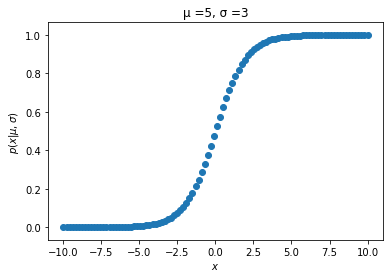

In [13]:
x = np.linspace(-10, 10, 100)
p = stats.logistic.cdf(x) # ロジスティック分布の累積確率がロジスティック関数になる
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | μ, σ) $ ')
plt.title("μ =" + str(mu) + ", σ =" + str(sigma))

## 正規分布

Text(0.5, 1.0, 'μ =5, σ =1')

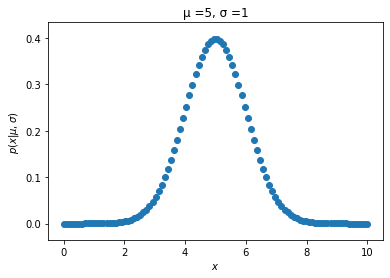

In [14]:
x = np.linspace(0, 10, 100)
mu = 5
sigma = 1
p = stats.norm.pdf(x, mu, sigma)
plt.scatter(x, p)
plt.xlabel('$ x $')
plt.ylabel('$ p(x | μ, σ) $ ')
plt.title("μ =" + str(mu) + ", σ =" + str(sigma))

## ガウス混合分布

In [15]:
N = 1000
mu1 = 30
sigma1 = 10
mu2 = 60
sigma2 = 5

pi = 0.3

In [16]:
data1 = np.random.normal(mu1, sigma1, N)
data2 = np.random.normal(mu2, sigma2, N)

t = stats.bernoulli.rvs(pi, size=N)
data = np.append(data1[t == 1], data2[t == 0])

(array([ 2.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  5.,  5., 10.,
         7.,  4., 11., 11.,  6., 12.,  9., 18., 11., 13., 15., 16., 24.,
        14., 11., 10., 10., 10., 11.,  6.,  6.,  4.,  4.,  8., 14., 15.,
        19., 26., 41., 37., 39., 62., 69., 65., 85., 55., 59., 51., 34.,
        20.,  8.,  7.,  6.,  0.,  2.,  2.,  2.]),
 array([ 1.31004564,  2.57678924,  3.84353283,  5.11027643,  6.37702002,
         7.64376362,  8.91050722, 10.17725081, 11.44399441, 12.710738  ,
        13.9774816 , 15.2442252 , 16.51096879, 17.77771239, 19.04445598,
        20.31119958, 21.57794318, 22.84468677, 24.11143037, 25.37817396,
        26.64491756, 27.91166116, 29.17840475, 30.44514835, 31.71189194,
        32.97863554, 34.24537914, 35.51212273, 36.77886633, 38.04560993,
        39.31235352, 40.57909712, 41.84584071, 43.11258431, 44.37932791,
        45.6460715 , 46.9128151 , 48.17955869, 49.44630229, 50.71304589,
        51.97978948, 53.24653308, 54.51327667, 55.78002027, 57.04676387,
 

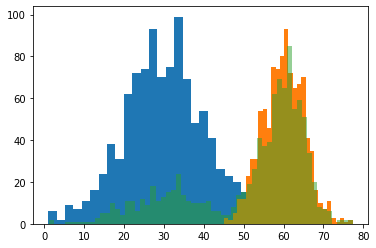

In [17]:
plt.hist(data1,bins=30)
plt.hist(data2, bins=30)
plt.hist(data, bins=60, alpha=0.5)

In [18]:
W = np.array([pi, 1-pi])

MU = np.array([mu1, mu2])
SIGMA = np.array([sigma1, sigma2])

component = np.random.choice(MU.size, size=N, p=W)
x = np.random.normal(MU[component], SIGMA[component], size=N)

(array([ 3.,  2.,  5., 12., 12., 23., 31., 31., 54., 55., 46., 75., 74.,
        80., 93., 72., 65., 67., 70., 41., 35., 16., 10.,  7., 11.,  3.,
         1.,  3.,  1.,  2.]),
 array([45.10672192, 46.1803199 , 47.25391788, 48.32751586, 49.40111385,
        50.47471183, 51.54830981, 52.6219078 , 53.69550578, 54.76910376,
        55.84270175, 56.91629973, 57.98989771, 59.06349569, 60.13709368,
        61.21069166, 62.28428964, 63.35788763, 64.43148561, 65.50508359,
        66.57868157, 67.65227956, 68.72587754, 69.79947552, 70.87307351,
        71.94667149, 73.02026947, 74.09386745, 75.16746544, 76.24106342,
        77.3146614 ]),
 <a list of 30 Patch objects>)

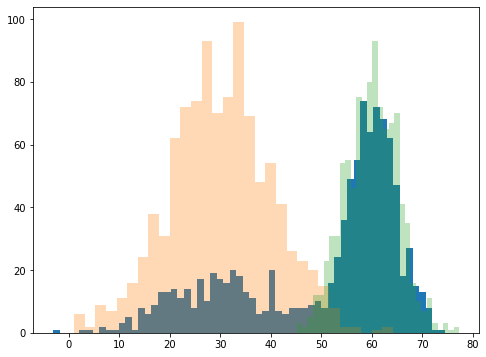

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x, bins=60, lw=0)
ax.hist(data1, bins=30, alpha=0.3)
ax.hist(data2, bins=30, alpha=0.3)

In [20]:
x.shape

(1000,)

## Ref.

https://data-science.gr.jp/theory.html#tpd